In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-03-BIGDATA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


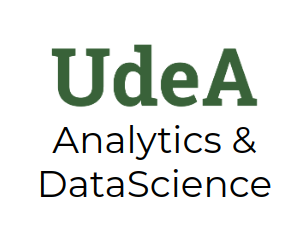

In [2]:
Image("local/imgs/udea-datascience.png")

# **MAP REDUCE EN SPARK**

# **Preparación del ambiente de trabajo**


##1. Instalación de herramientas necesarias

*   Java
*   Apache Spark
*   FindSpark





In [3]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz 
!pip install -q findspark

##2. Configuración de variables de entorno


*   JAVA
*   SPARK



In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

##3. Obtener el Spark Context

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

#**Map Reduce**



Map Recue es un **Paradigma de programación** que permite trabajar en **ambientes distribuidos** usando una gran cantidad de servidores que conforman un **clúster**.

Requiere de las siguientes etapas



*   **Map:** recibe un conjunto de datos y lo transforma en un segundo conjunto de datos cuyos elementos se representan en tuplas (clave-valor)
*   **Reduce:** Utiliza como entrada las tuplas generadas por el map y genera un conjunto de datos de salida reducido a partir de la combinación de los datos recibidos

En el siguiente gráfico se muestra la forma como interactúan estas dos etapas


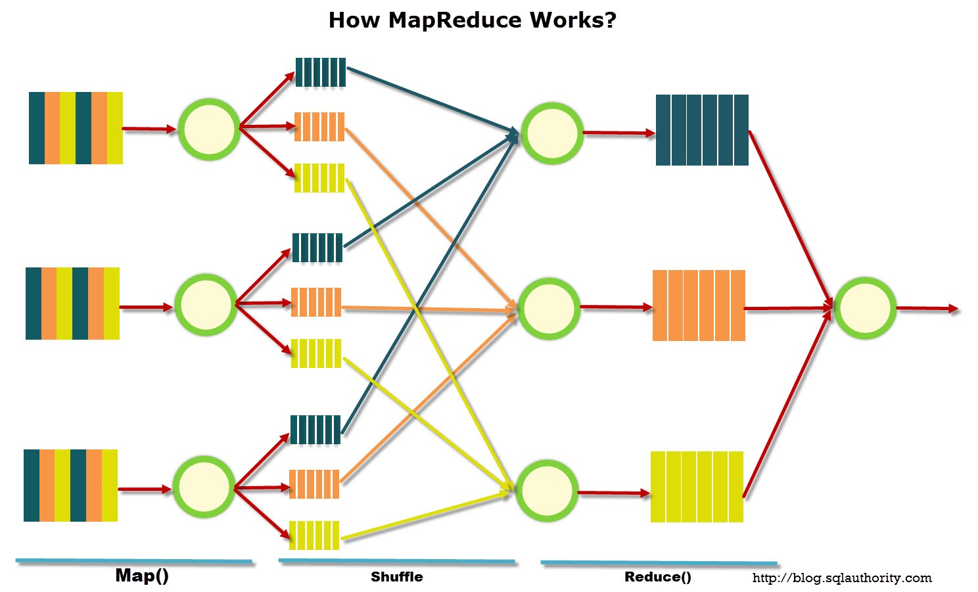

In [6]:
Image("local/imgs/map_reduce.png")

Para Ilustrar la operación de Map Redcue vamos a utilizar tres variables


*   num: Secuencia de números del 0 al 5
*   tuplas: Pares ordenados de números en formato (clave, valor)
*   texto: Archivo de texto



In [7]:
num = sc.parallelize([0, 1, 2, 3, 4, 5])

In [8]:
tuplas = sc.parallelize([[0, 1], [0,2], [0,3], [1,5], [1,6], [2,9]])

In [9]:
text = sc.textFile("local/data/animales.txt")

##**Map**

Recibe un conjunto de datos y lo transforma en un segundo conjunto de datos cuyos elementos se representan en tuplas (clave-valor)

###Función map
Devuelve un nuevo conjunto de datos distribuido formado al pasar cada elemento de la fuente a través de una función.


Usando la variable num (0, 1, 2, 3, 4, 5) apliquemos map para multiplicar cada elemento por 2

In [10]:
num.collect()

[0, 1, 2, 3, 4, 5]

In [11]:
numMap=num.map(lambda x:(x,2*x))
numMap.collect()

[(0, 0), (1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]

Usando la variable text, apliquemos la función map para obtener cada uno de los elementos separados por un espacio

In [12]:
text.collect()

['Gato Perro Conejo', 'Conejo Gato Conejo', 'Perro Conejo Gato']

In [13]:
wordsMap = text.map(lambda line: line.split(" "))
print("El número de elementos de entrada es: ", text.count())
text.collect()
print("El número de elementos de salida es", wordsMap.count())
wordsMap.collect()


El número de elementos de entrada es:  3
El número de elementos de salida es 3


[['Gato', 'Perro', 'Conejo'],
 ['Conejo', 'Gato', 'Conejo'],
 ['Perro', 'Conejo', 'Gato']]

###Función flatMap
Similar al map, pero cada elemento de entrada se puede asignar a 0 o más elementos de salida. Esto significa que devuelve una secuencia en lugar de un solo elemento.


Usando la variable num (0, 1, 2, 3, 4, 5) apliquemos flatMap para multiplicar cada elemento por 2

In [14]:
numFlatMap=num.flatMap(lambda x:(x,2*x))
numFlatMap.collect()

[0, 0, 1, 2, 2, 4, 3, 6, 4, 8, 5, 10]

Usando la variable text, apliquemos la función map para obtener cada uno de los elementos separados por un espacio

In [15]:
wordsFlatMap = text.flatMap(lambda line: line.split(" "))
print("El número de elementos de entrada es: ", text.count())
print("El número de elementos de salida es", wordsFlatMap.count())
wordsFlatMap.collect()

El número de elementos de entrada es:  3
El número de elementos de salida es 9


['Gato',
 'Perro',
 'Conejo',
 'Conejo',
 'Gato',
 'Conejo',
 'Perro',
 'Conejo',
 'Gato']

##**Reduce**
Utiliza como entrada las tuplas generadas por el map y genera un conjunto de datos de salida reducido a partir de la combinación de los datos recibidos

###Función reduce
Reduce los elementos de utilizando el operador binario conmutativo y asociativo especificado


Apliquemos reduce a la variable num (0, 1, 2, 3, 4, 5) para obtener la suma de los términos

In [16]:
num.collect()

[0, 1, 2, 3, 4, 5]

In [18]:
numReduce=num.reduce(lambda a,b:a+b)
print("La suma es: ", numReduce)

La suma es:  15


Apliquemos reduce a la variable num (0, 1, 2, 3, 4, 5) para conseguir el valor menor

In [19]:
numReduce=num.reduce(lambda a,b: a if a<b else b)
print("El menor es: ", numReduce)

El menor es:  0


Apliquemos reduce a la variable num (0, 1, 2, 3, 4, 5) para obtener el mayor de los términos utilizando la función max

In [20]:
numReduce=num.reduce(lambda a,b:max(a,b))
print("El mayor es: ", numReduce)

El mayor es:  5


###Función reduceByKey
Cuando se llama a un conjunto de datos de pares (K, V), devuelve un conjunto de datos de pares (K, V) donde los valores de cada clave se agregan usando la función de reducción dada, que debe ser de tipo (V, V) => V.


Visualicemos la variable tuplas

In [21]:
tuplas.collect()

[[0, 1], [0, 2], [0, 3], [1, 5], [1, 6], [2, 9]]

Utilicemos la variable tuplas para sumar los elementos que contengan la misma clave

In [22]:
tuplasReduce=tuplas.reduceByKey(lambda a,b:a+b)
tuplasReduce.collect()

[(0, 6), (2, 9), (1, 11)]

Utilicemos la variable tuplas para encontrar el menor valor de cada clave

In [23]:
tuplasReduce=tuplas.reduceByKey(lambda a,b: a if a<b else b)
tuplasReduce.collect()

[(0, 1), (2, 9), (1, 5)]

#**Ejemplos**

Ahora que ya sabemos que es Map Reduce y  como utilizar las funciones map y reduce, vamos a realizar algunos ejemplos 


##**Analicemos la sucesión de Fibonacci**

Fibonacci propone una sucesión infinita compuesta por números que se generan a partir de la suma de los dos términos anteriores de la sucesión.

0  1  1  2  3  5  8  13  21  34  55  89 ...

Será posible construir la sucesión de Fibonacci a partir de un proceso map reduce?

In [24]:
#Función que crea la sucesión de Fibonacci usando un ciclo
def fibonacci(n):
    x, y = 0,1
    while x < n:
      print(x, end=' ')
      x, y = y, x+y
    

In [25]:
#Generemos los primeros términos de la sucesión de Fibonacci hasta el número 100
fibonacci(100)

0 1 1 2 3 5 8 13 21 34 55 89 

###Calculemos la suma del cuadrado de los elementos de la sucesión

Primero creamos la variable fibo donde representamos la sucesión

In [26]:
fibo = sc.parallelize([0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])
fibo.collect()

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

Ahora utilizemos una función map que nos permite tomar cada elemento de la sucesión y multiplicarlo por sí mismo. El resultado es un nuevo conjunto de datos que contiene el cuadrado de los elementos iniciales

In [27]:
fibo2 = fibo.map(lambda x: x*x)
fibo2.collect()

[0, 1, 1, 4, 9, 25, 64, 169, 441, 1156, 3025, 7921]

Ahora utilicemos la función reduce para sumar el resultado que obtuvimos en la función map anterior

In [28]:
from operator import add
fibo2Sum = fibo2.reduce(add)
print ("La suma del cuadrado de los elementos de la sucesión es: ", fibo2Sum)

La suma del cuadrado de los elementos de la sucesión es:  12816


###Sumemos los números pares de la sucesión

¿Debo usar map y luego reduce?

Método 1: usando map para identificar si el número es par y luego sumo con reduce



In [29]:
fibo.collect()

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [30]:
fibo2 = fibo.map(lambda x: x if x%2==0 else 0)
fibo2.collect()

[0, 0, 0, 2, 0, 0, 8, 0, 0, 34, 0, 0]

In [31]:
fibo2Sum = fibo2.reduce(lambda a,b:a+b)
print(fibo2Sum)

44


Método 2: usando solo reduce 

In [32]:
fiboPar = fibo.reduce(lambda a,b: a+b if b%2==0 else a)
print (fiboPar)

44


##**Calculemos el valor del Número PI**

Pi es uno de los números más famosos de toda la historia de la humanidad. A demás de definir la longitud de una circunferencia se utiliza para muchos fines prácticos entre ellos la astronomía permitiéndonos tener GPS precisos.

Al ser un número irracional la precisión dependerá de la cantidad de dígitos con los que lo representemos. En este ejemplo vamos a realizar el cálculo del número PI de manera aproximada mediante el método Monte-Carlo

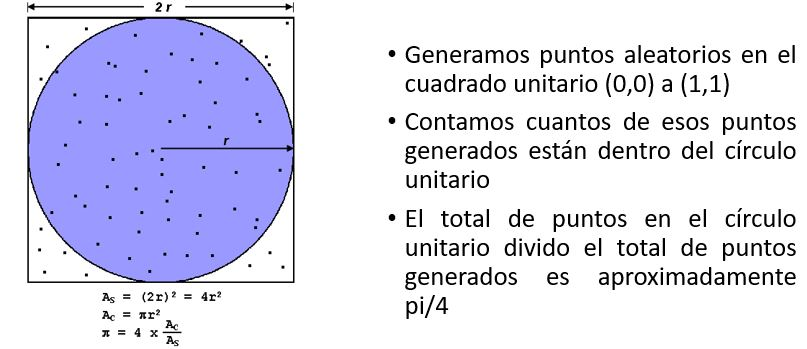

In [33]:
Image("local/imgs/pi.png")

In [34]:
import numpy as np

Vamos a definir una función que genere aleatoriamente coordenadas (x,y) utilizando valores entre 0 y 1.
Algunos de estos puntos quedarán dentro del círculo unitario y otros por fuera, esto nos permitirá calcular el valor de PI.
La función devuelve 1 si la coordenada generada está dentro del círculo unitario y 0 de lo contrario

In [35]:
def func(p):
    #Creamos aleatoriamente una cooredenada x,y
    x, y = np.random.random(), np.random.random()
    #Devolvemos 1 si la coordenada hace parte del círulo y 0 de lo contrario
    return 1 if x*x + y*y < 1 else 0


Creamos una secuencia de números entre 0 y n que servirán para crear los números aleatorios

In [36]:
n = 1000000
nums = sc.parallelize(range(0, n))
nums.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Creamos una función map que invocará a la función que genera las coordenadas y nos devuelve 1 si la coordenada pertenece al círculo unitario

In [37]:
mapNum=nums.map(func)
mapNum.take(10)

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

Ahora utilicemos un reduce para contabilizar las coordenadas que quedaron dentro del círculo unitario

In [38]:
count=mapNum.reduce(lambda a, b: a + b)
count

784887

In [39]:
count=nums.map(func).reduce(lambda a, b: a + b)

Finalmente calculamos el valor de PI

In [40]:
#pi= 4*r
r = float(count) / float(n)
print ("El valor de PI es aproximadamente %f" % (4.0 * r))

El valor de PI es aproximadamente 3.146812


##**Contador de Palabras**

Utilizando map reduce, vamos a contar cuantas veces se repite cada una de las palabras presentes en un texto dado.

La siguiente imagen ayudará a comprender el flujo del proceso y el papel de las funciones map y reduce

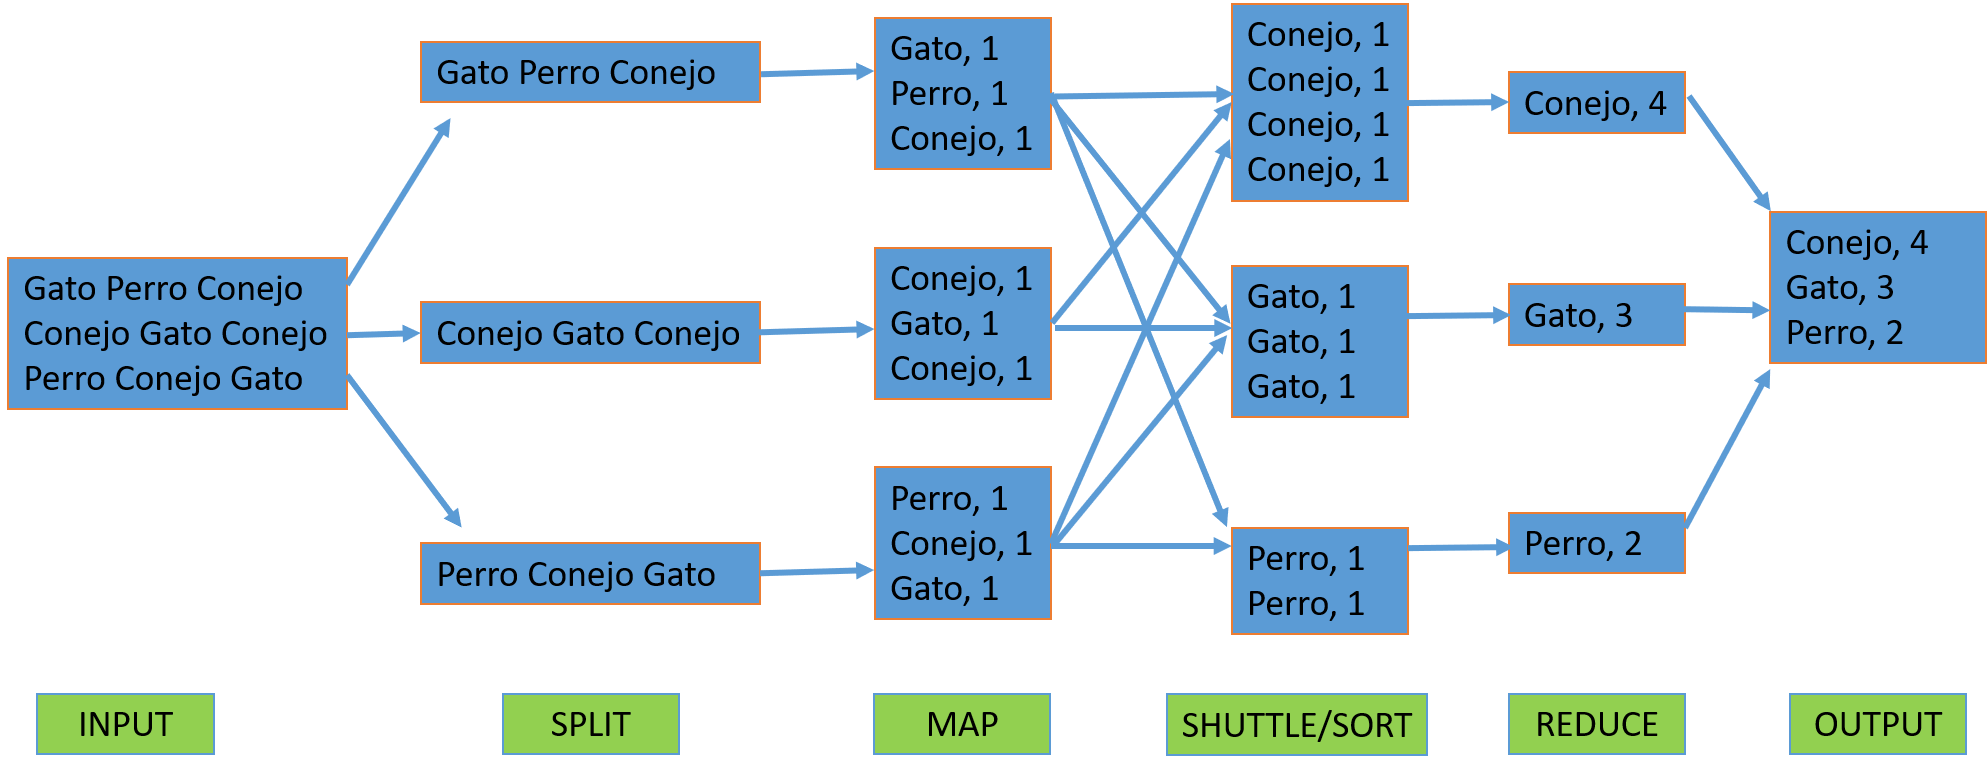

In [41]:
Image("local/imgs/wordcount.png")

###Ingresando las palabras directamente en una variable

In [42]:
texto = sc.parallelize(['gato', 'perro', 'conejo', 'conejo', 'gato','conejo','perro','conejo','gato'])
texto.collect()

['gato',
 'perro',
 'conejo',
 'conejo',
 'gato',
 'conejo',
 'perro',
 'conejo',
 'gato']

Con la ayuda de la función map generamos la tupla (palabra,1) para cada una de las palabras ingresadas

In [43]:
cont = texto.map(lambda x: (x,1))
cont.collect()

[('gato', 1),
 ('perro', 1),
 ('conejo', 1),
 ('conejo', 1),
 ('gato', 1),
 ('conejo', 1),
 ('perro', 1),
 ('conejo', 1),
 ('gato', 1)]

Con la ayuda de la función reduceByKey tomamos todas las tuplas que contengan la misma clave, en este caso la misma palabra, y sumamos sus valores, es decir las veces que aparece cada palabra

In [44]:
res = cont.reduceByKey(lambda x, y: x + y)
print("Las siguientes tuplas nos muestran cuantas veces aparece cada palabra en el texto ingresado")
res.collect()

Las siguientes tuplas nos muestran cuantas veces aparece cada palabra en el texto ingresado


[('perro', 2), ('conejo', 4), ('gato', 3)]

###Leyendo un archivo de texto


*   Leemos el archivo de texto
*   Aplicamos la función flatMap para obtener una variable con todas las palabras
*   Aplicamos la función map para genera la tupla (palabra,1)
*   Aplicamos la función reduceByKey para sumar los valores de las tuplas que contienen la misma palabra





In [45]:
text_file = sc.textFile("local/data/animales.txt")
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
counts.collect()

[('Gato', 3), ('Perro', 2), ('Conejo', 4)]

Almacenamos el resultado en un fichero

In [46]:
counts.saveAsTextFile("local/data/contAnimales")

##**Máxima Temperatura**

Vamos a leer un archivo que contiene los valores de temperatura entregados por los sensores ubicados en varias ciudades. El objetivo es encontrar cuál es la máxima temperatura reportada en cada departamento.
Fuente de los datos: www.datos.gov.co


In [47]:
text_file = sc.textFile("local/data/temperatura.txt")
text_file.take(10)

['META,34.3',
 'AMAZONAS,23.3',
 'META,24.1',
 'CALDAS,4.1',
 'META,33.4',
 'CAUCA,20.4',
 'CUNDINAMARCA,5.5',
 'CALDAS,18.1',
 'ANTIOQUIA,29.9',
 'CUNDINAMARCA,17']

En el archivo temperatura.txt tenemos el departamento y la temperatura separados por coma. Aplicamos un split para separar ambos valores mediante una función map

In [48]:
data1=text_file.map(lambda a: (a.split(",")))
data1.take(10)

[['META', '34.3'],
 ['AMAZONAS', '23.3'],
 ['META', '24.1'],
 ['CALDAS', '4.1'],
 ['META', '33.4'],
 ['CAUCA', '20.4'],
 ['CUNDINAMARCA', '5.5'],
 ['CALDAS', '18.1'],
 ['ANTIOQUIA', '29.9'],
 ['CUNDINAMARCA', '17']]

Usamos nuevamente una función map para generar la tupla (departamento, temperatura)

In [49]:
data2=data1.map(lambda word: (word[0], float (word[1]) ) )
data2.take(10)

[('META', 34.3),
 ('AMAZONAS', 23.3),
 ('META', 24.1),
 ('CALDAS', 4.1),
 ('META', 33.4),
 ('CAUCA', 20.4),
 ('CUNDINAMARCA', 5.5),
 ('CALDAS', 18.1),
 ('ANTIOQUIA', 29.9),
 ('CUNDINAMARCA', 17.0)]

Utilizamos la función reduceByKey para encontrar el valor máximo de temperatura en cada grupo de tuplas que contengan el mismo departamento

In [50]:
data3=data2.reduceByKey(lambda a,b: max(a,b))
print("A continuación se presenta la temperatura máxima de cada departamento")
data3.collect()

A continuación se presenta la temperatura máxima de cada departamento


[('AMAZONAS', 48.6),
 ('BOYACÁ', 28.7),
 ('TOLIMA', 33.5),
 ('PUTUMAYO', 28.9),
 ('SUCRE', 35.0),
 ('CESAR', 35.0),
 ('MAGDALENA', 36.6),
 ('CÓRDOBA', 37.4),
 ('NARIÑO', 25.7),
 ('ATLÁNTICO', 36.5),
 ('RISARALDA', 21.3),
 ('CHOCÓ', 29.8),
 ('CORDOBA', 33.3),
 ('LA GUAJIRA', 31.5),
 ('CHOCO', 32.4),
 ('ARAUCA', 9.41),
 ('META', 34.3),
 ('CALDAS', 25.5),
 ('CAUCA', 38.4),
 ('CUNDINAMARCA', 34.7),
 ('ANTIOQUIA', 29.9),
 ('SANTANDER', 35.8),
 ('VALLE DEL CAUCA', 32.6),
 ('BOGOTA', 20.9),
 ('NORTE DE SANTANDER', 40.0),
 ('HUILA', 30.0),
 ('CASANARE', 31.9),
 ('SAN ANDRÉS PROVIDENCIA', 29.3),
 ('CAQUETA', 26.4),
 ('BOLIVAR', 32.5),
 ('QUINDÍO', 28.5),
 ('BOGOTA D.C.', 18.8),
 ('ATLANTICO', 30.6),
 ('NARINO', 27.2)]

##**PageRank**

PageRank es un método que propone Google para evaluar la autoridad que tiene un sitio web en internet, esa autoridad se calcula evaluando la cantidad y calidad de enlaces provenientes de otros sitios web.

Con el PageRank se genera un sistema de ranking para conocer la importancia de un sitio Web calculado sobre la premisa de que un sitio es importante si es referenciado por otros sitios que sean importantes y esa calificación tiene implicaciones en la posición en que aparecerá dicho sitio cuando un usuario realiza una consulta en Google.

La siguiente imagen ayudará a entender la forma como se calcula el PageRank

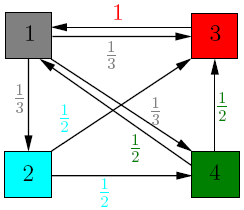

In [51]:
Image("local/imgs/pagerank.png")

Definimos la función computeContribs que permite calcular la contribución de una url en el rank de otras urls. Es decir que dada una url que tiene cierta importancia (rank) reparte esa importancia a las demás urls a través de los enlaces que tenga a dichas urls.

Como resultado entrega tuplas compuestas por cada url referenciada y el valor del rank que le corresponde

In [52]:
def computeContribs(urls, rank):
    #Calculates URL contributions to the rank of other URLs
    num_urls = len(urls)
    for url in urls:
        yield (url, rank / num_urls)

Definimos la función parseNeighbors que genera tuplas a partir de una lista que contiene las urls y sus enlaces

In [53]:
def parseNeighbors(urls):
    #Parses a urls pair string into urls pair
    parts = re.split(r'\s+', urls)
    return parts[0], parts[1]

Leemos el archivo que contiene la información a analizar compuesto por líneas donde cada línea relaciona una url y un enlace de esa url a otra url

In [54]:
lines = sc.textFile("local/data/pagerank.txt")
lines.collect()

['1 2', '1 3', '1 4', '2 3', '2 4', '3 1', '4 1', '4 3']

Utilizamos la función map para generar tuplas de datos cuya clave será la url y el valor representa los enlaces realizados por dicha url a otras urls

In [55]:
# initialize their neighbors.
import re
links = lines.map(lambda urls: parseNeighbors(urls)).distinct().groupByKey().cache()
links.collect()

[('1', <pyspark.resultiterable.ResultIterable at 0x7f19e326aa50>),
 ('4', <pyspark.resultiterable.ResultIterable at 0x7f19e326a590>),
 ('2', <pyspark.resultiterable.ResultIterable at 0x7f19e326a850>),
 ('3', <pyspark.resultiterable.ResultIterable at 0x7f19e326ac90>)]

Inicialmente vamos a asumir que todas las urls tienen la misa autoridad (1). Utilizamos la función map para generar la tupla (url,1) indicando que cada url tiene una rank de 1

In [56]:
# Loads all URLs with other URL(s) link to from input file and initialize ranks of them to one.
ranks = links.map(lambda url_neighbors: (url_neighbors[0], 1.0))
ranks.collect()

[('1', 1.0), ('4', 1.0), ('2', 1.0), ('3', 1.0)]

Aplicamos una iteración de 10 pasos donde calculamos la contribución de cada url a las demás urls a través de la función computeContribs en un proceso flatMap y a partir de esa contribución recalculamos el rank de cada url.


In [57]:
from operator import add
# Calculates and updates URL ranks continuously using PageRank algorithm.
for iteration in range(10):
  # Calculates URL contributions to the rank of other URLs.
  contribs = links.join(ranks).flatMap(lambda url_urls_rank: computeContribs(url_urls_rank[1][0], url_urls_rank[1][1]))
  # Re-calculates URL ranks based on neighbor contributions.
  ranks = contribs.reduceByKey(add).mapValues(lambda rank: rank * 0.85 + 0.15)

Veamos el rank de cada página luego de las 10 iteraciones

In [58]:
# Collects all URL ranks and dump them to console.
for (link, rank) in ranks.collect():
  print("%s has rank: %s." % (link, rank))

2 has rank: 0.5671094097639748.
3 has rank: 1.151795159344013.
4 has rank: 0.8081470492728162.
1 has rank: 1.4729483816191942.


#**Ejercicios**#

Se dispone de un set de datos que describen la situación del covid19 en Colombia obtenidos de https://www.datos.gov.co/

Estos datos relacionan los casos positivos en Colombia a través de las siguientes variables



*   Ciudad
*   Departamento
*   Atención (casa, fallecido, hospital, hospital/uci, recuperado)
*   Edad
*   Tipo (En estudio, importado, relacionado)
*   Estado (Asintomático, Fallecido, Grave, Leve, Moderado)



Dada la cantidad de casos positivos en el país, apliquemos map reduce para resolver las siguientes inquietudes

1.   Cuánto es el total de fallecidos y recuperados en el país
2.   Afectará la pandemia a hombres y  mujeres por igual
3.   Cuál es el promedio de edad de los afectados
4.   Cuál es el departamento que presenta mayor número de casos
5.   Que porcentaje de los casos son importados
6.   Es cierto que en Cartagena la mayoría de los casos son importados

